<font size=6  color=#003366> [LEPL1109] - STATISTICS AND DATA SCIENCES <br><br> 
(PART II) TP 02 - When the best is the enemy of the good...   </font> <br><br><br>

<font size=5  color=#003366>
Prof. D. Hainaut<br>
Prof. L. Jacques<br>
</font>

---
Table of content: 
* 1 - THE PROBLEM OF OVERFITTING (30')
   - 1.1 - Starter - A first taste of overfitting 
   - 1.2 - Main course - Regularization as a tool 
   - 1.2 - Dessert - What if we overfit the overfitting? 
    <br><br>
* 2 - MODEL AND PARAMETER SELECTION  (50')
    <br><br>
* 3 - FROM REGRESSOR TO CLASSIFIER (40')
  
---

<br>
<font size=6 color=#009999> 1 - THE PROBLEM OF OVERFITTING </font> <br>
<br>

*Protip: Have a quick look to [`theory_tp2.pdf`](theory_tp2.pdf), for some reminder about some mathematical tools required to solve this exercice, as well as some complementatry information that can help your understanding.* 

<br><br>
<font size=5 color=#009999> 1.1 STARTER </font> <br>
<font size=4 color=#009999>
A FIRST TASTE OF OVERFITTING
</font> <br> <br>
</font>

Assume a target variable $y \in \mathbb{R} $ from a single feature $x \in \mathbb{R}$. We want to create a polynomial model from a sample of $N$ observations: $(\textbf{x}, \textbf{y}) \in \mathbb{R}^{N} \times \mathbb{R}^{N}$. We will analyze three different regression models:

- $f_0$: A *constant* linear regression model;
- $f_1$: A linear regression model;
- $f_4$: A polynomial (degree 4) regression model.

The models are evaluated using the least-squares error between their predictions based on $\textbf{x}$ and the observations $\textbf{y}$: $$||\mathbf{f}_p(\textbf{x}) - \textbf{y}||_2^2 \, ,$$

for $p \in \left \{0, 1, 4 \right \}$.


<b>Link between polynomial approximations and linear regressions:</b> 
    The polynomial model considered here is the following:
    $(f_p) \qquad \mathbf{y} =  \mathbf{f}_p(\mathbf{x})+ \boldsymbol{\epsilon} , $
    where 
    $$ \mathbf{f}_p(\mathbf{x}) := \sum_{l=0}^p \beta_l \mathbf{x}^l ,$$
    while the power function applied to the vector $\mathbf{x}$ is taken component-wise.<br>
    This approximation problem can be written as a standard data science problem. Indeed, it suffices to consider the <b>Vandermonde matrix</b>, $\mathbf{V}_p$, of the data points:
    $$ \mathbf{V}_p :=        \begin{bmatrix}
            1 & x_1 & x_1^2 & \dots & x_1^p \\
            1 & x_2 & x_2^2 & \dots & x_2^p \\
            \vdots & \vdots & \vdots & \vdots \\
            1 & x_N & x_N^2 & \dots & x_N^p  \\
        \end{bmatrix}.$$ <br>
    Using this matrix, the model becomes a classical linear regression model
        $$ \qquad \mathbf{\hat{y}} = \mathbf{V}_p \boldsymbol{\beta}   . $$ <br>
    In this way, we transformed our initial problem of <em>polynomial curve fitting</em> of a single feature $x$ to a <em>linear regression</em> of a set of $(p+1)$ artificially created features $(1, x, x^2, \dots, x^p)$. Note that the Vandermonde matrix, $\textbf{V}_p$, corresponds to the <b>feature matrix</b>, usually denoted as $\textbf{X}$.
    


<br>

Therefore, the **evaluation of the models can be done through the cost function** (that should be as close to zero as possible):
$$||\textbf{V}_p \boldsymbol{\beta} - \textbf{y}||_2^2,$$
where $\beta$ is the vector of coefficients of the polynomial model.

Using this cost function, the optimal solution is called the solution in the *least-squares* sense and is computed as


$$\boldsymbol{\beta}^* = (\mathbf{V}_p^T \mathbf{V}_p)^{-1} \mathbf{V}_p^T \mathbf{y} \, . \qquad (1)$$

<br>

<div class="alert alert-info">
<b>EXERCISE 1 </b> <br>
    Complete the <code>compute_y_reg</code> function which makes predictions at points <code>X_reg</code> based on a polynomial model. <br><br>
    
<b>Discussion: </b><br>
    <ol>
        <li>Compare all three models ($f_0$, $f_1$ and $f_4$), and explain the performance of each one. Do you observe any problem? How to detect and overcome this problem in practice?</li>
        <li>Print and discuss the value of $\boldsymbol{\beta}$ for each model.</li>
    </ol>
</div> 



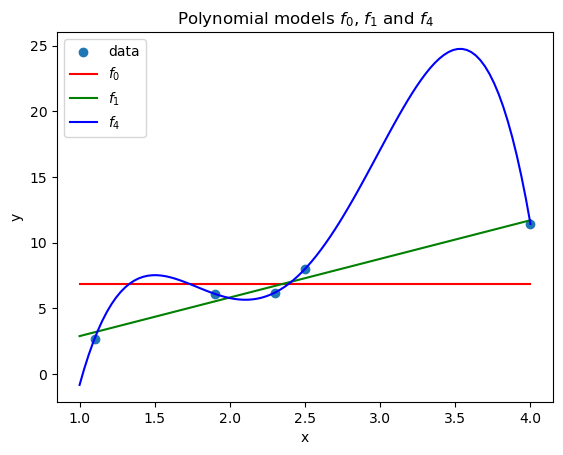

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data 
X = np.array([[1.1, 1.9, 2.3, 2.5, 4.0]]).T
y = np.array([[2.7, 6.1, 6.2, 8.0, 11.42]]).T

# Points at which the model is evaluated
X_reg = np.reshape(np.linspace(1, 4, 100), (100, 1))

"""--------------------------------------------------
Return the predictions y_reg of a model of degree n evaluated at points X_reg. 
First, model paremeters beta are evaluated thanks to: beta = (V.T V)^(-1) V.T y, 
then predictions are obtained via: y_reg = V_reg beta

INPUT: 
    - V : vandermonde matrix on the synthetic data
    - y : y vector of synthetic data
    - V_reg : vandermonde matrix on the evaluation points
OUTPUT:
    - y_reg: evaluation of the model on the the evaluation points (encoded in V_reg)
--------------------------------------------------"""
def compute_y_reg(V, y, V_reg): 
    beta  = np.linalg.solve(np.transpose(V)@V,np.transpose(V)@y)
    y_reg = V_reg@beta
    return y_reg  # TO CHANGE: array full of 0 to run the plot



# ----------------------------------------------------------------------------------------
# f0 Model
# ----------------------------------------------------------------------------------------
V_0     = np.reshape(np.ones_like(X), (len(X), 1))
V_reg_0 = np.ones_like(X_reg)
y_reg_0 = compute_y_reg(V_0, y, V_reg_0)

# ----------------------------------------------------------------------------------------
# f1 Model
# ----------------------------------------------------------------------------------------
V_1     = np.hstack((np.ones_like(X), X))
V_reg_1 = np.hstack((np.ones_like(X_reg), X_reg)) 
y_reg_1 = compute_y_reg(V_1, y, V_reg_1)


# ----------------------------------------------------------------------------------------
# f4 Model
# ----------------------------------------------------------------------------------------
V_4     = np.hstack((np.ones_like(X), X, np.power(X, 2), np.power(X, 3), np.power(X, 4)))
V_reg_4 = np.hstack((np.ones_like(X_reg), X_reg, np.power(X_reg, 2), np.power(X_reg, 3), np.power(X_reg, 4))) 
y_reg_4 = compute_y_reg(V_4, y, V_reg_4)


plt.scatter(X, y, label='data')
plt.plot(X_reg, y_reg_0, color='r', label='$f_0$')
plt.plot(X_reg, y_reg_1, color='g', label='$f_1$')
plt.plot(X_reg, y_reg_4, color='b', label='$f_4$')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial models $f_0$, $f_1$ and $f_4$")
plt.legend()
plt.show()

<br><br>
<font size=5 color=#009999> 1.2 MAIN COURSE </font> <br>
<font size=4 color=#009999>
REGULARIZATION AS A TOOL
</font> <br> <br>
</font>


We propose to use *Tikhonov regularization* as a tool to avoid our model to overfit the data. This is done by penalizing the euclidean norm of the model parameters. In particular, let $\boldsymbol{\beta}$ be the parameters, the optimization problem to obtain our regression model is now

$$ \min_{\boldsymbol{\beta}} {|| V \boldsymbol{\beta} - \mathbf{y} ||_2^2 + \lambda || \boldsymbol{\beta}||_2^2},  $$

for a given metaparameter $\lambda \geq 0$.

The optimal solution is now

$$ \boldsymbol{\beta}^* = (\mathbf{V_p}^T \mathbf{V_p} + \lambda \boldsymbol{I}_{p+1})^{-1} (\mathbf{V_p}^T \mathbf{y}), $$

with $\textbf{I}_{p+1}$ the appropriate identity matrix.

<b>EXERCISE 2 </b> <br>
<ol>
    <li> <b>Using the regularization: </b> Modify you code of the previous question to account for the regularization. How do the models perform with $\lambda = 10^6$, $1$, $10^{-3}$ or $10^{-5}$? Print and discuss the values of $\boldsymbol{\beta}$.

Give two advantages of such regularization.<br> <br>
            <li> <b>  Playing with $\lambda$: </b>Interpret the solution for $\lambda = 0$ and $\lambda \to \infty$.

</ol>
perform with 

$$ \lambda = 10^6, 1, 10^{-3} \text{or} 10^{-5}? \text{Print and discuss the values of} \boldsymbol{\beta} $$

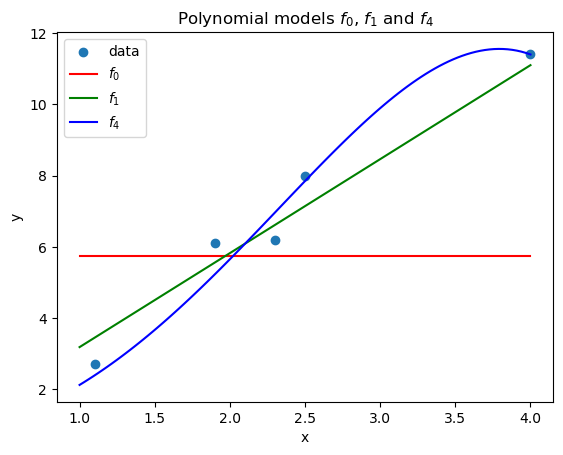

In [15]:
import numpy as np
import matplotlib.pyplot as plt

"""--------------------------------------------------
Perform the same job than compute_y_reg with a regularization parameter lambd

INPUT: 
    - V : vandermonde matrix on the synthetic data
    - y : y vector of synthetic data
    - V_reg : vandermonde matrix on the evaluation points
    - lamb : regularization parameter
OUTPUT:
    - y_reg: evaluation of the model on the the evaluation points (encoded in V_reg)
--------------------------------------------------"""
def compute_y_reg_with_regularization(V, y, V_reg, lambd=0): 
    
    beta  = np.linalg.solve(np.transpose(V)@V+lambd*np.eye(V.shape[1],V.shape[1]),np.transpose(V)@y)
    y_reg = V_reg@beta
    return y_reg  # TO CHANGE: array full of 0 to run the plot


lambd = 1
# ----------------------------------------------------------------------------------------
# f0 Model
# ----------------------------------------------------------------------------------------
V_0     = np.reshape(np.ones_like(X), (len(X), 1))
V_reg_0 = np.ones_like(X_reg)
y_reg_0 = compute_y_reg_with_regularization(V_0, y, V_reg_0, lambd)

# ----------------------------------------------------------------------------------------
# f1 Model
# ----------------------------------------------------------------------------------------
V_1     = np.hstack((np.ones_like(X), X))
V_reg_1 = np.hstack((np.ones_like(X_reg), X_reg)) 
y_reg_1 = compute_y_reg_with_regularization(V_1, y, V_reg_1, lambd)


# ----------------------------------------------------------------------------------------
# f4 Model
# ----------------------------------------------------------------------------------------
V_4     = np.hstack((np.ones_like(X), X, np.power(X, 2), np.power(X, 3), np.power(X, 4)))
V_reg_4 = np.hstack((np.ones_like(X_reg), X_reg, np.power(X_reg, 2), np.power(X_reg, 3), np.power(X_reg, 4))) 
y_reg_4 = compute_y_reg_with_regularization(V_4, y, V_reg_4, lambd)


plt.scatter(X, y, label='data')
plt.plot(X_reg, y_reg_0, color='r', label='$f_0$')
plt.plot(X_reg, y_reg_1, color='g', label='$f_1$')
plt.plot(X_reg, y_reg_4, color='b', label='$f_4$')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial models $f_0$, $f_1$ and $f_4$")
plt.legend()
plt.show()

<br><br>
<font size=5 color=#009999> 1.3 - DESSERT </font> <br>
<font size=4 color=#009999>
WHAT IF WE OVERFIT THE OVERFITTING?
</font> <br> <br>
</font> 

We observed that the regularization parameter $\lambda$ is a powerful tool to prevent orverfitting. However, we need to properly set its value between $\lambda = 0$ (no regularization) and $\lambda = \infty$ (emphase is put on minimizing the norm of $\beta$ which tends towards 0). We propose you to comment the following method which has been implemented for you. For varying values of $\lambda$ between $10^{-3}$ and $10^3$, we set the optimal $\lambda$ as the one minimizing the validitation error. 


<div class="alert alert-info">
<b>EXERCISE 3 </b> <br>
We provide you two plots (keep the <code>flag_lambda_0=False</code> option): 
<ol>
    <li> First, the regularized versions of the $f_4$ model for varying values of $\lambda$ between $10^{-3}$ and $10^3$. Data belonging to the train, valditation and test sets are plotted in distinct colors. 
    <li> Second, the train and validation errors of the $f_4$ model for varying values of $\lambda$ between $10^{-3}$ and $10^3$. The opimal $\lambda$ is the one minimizing the validitation error. For this $\lambda^*$, the test error is represented on the graph.
</ol>
Comment the general trends of the graphs. Is the train or the validation error higher? Does it make sense? What are the values of $\lambda$ that you would accept/discard? <br>
    
By setting the <code>flag_lambda_0</code> option to <code>True</code>, you can observe the result obtained without regularization ($\lambda$=0). Observe the behavior of your model without regularization. What can you conclude?
</div>      

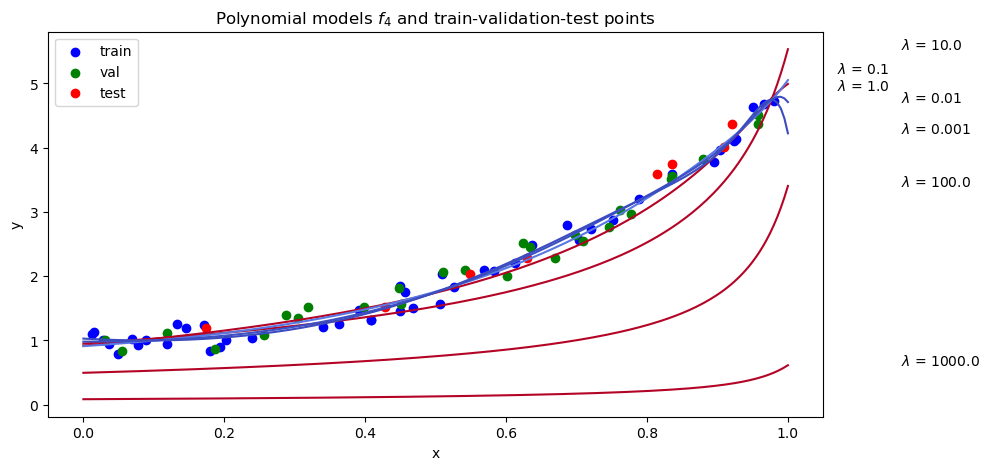

Optimal lambda is 0.13219411484660287


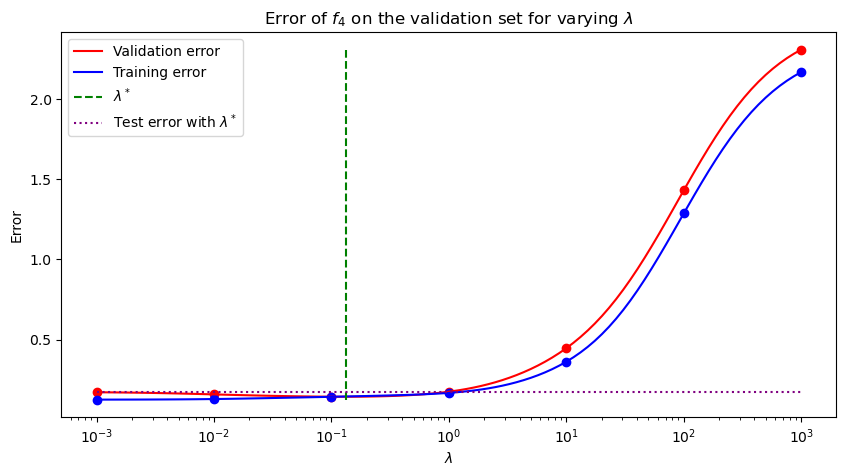

In [18]:
from exercise3 import exo3

np.random.seed(40)
exo3(flag_lambda_0 = False)


#On prend la courbe qui suit le mieux le train set

<br> <br>
<font size=6 color=#009999> 2 - MODEL AND PARAMETER SELECTION </font> <br>
<br>

You are interested in predicting the progression of diabete. For this purpose, you have access to different parameters such as age, sex, body mass index (BMI), average blood pressure and blood serum measurements. Your goal is to quantify the measure of disease progression. 

Let us first import the dataset (<a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes">load_diabetes</a> from sklearn). Note that there is no need to standardize the data as a preprocessing step has already been performed on them! 

We also split the dataset into a training and testing set, with test size 0.33.

In [19]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, shuffle=True, random_state=1
)

To perform your regression problem, you consider three distinct methods, each of them with one parameter:

- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor">k-nearest neighbors</a>, with as parameter k, the number of considered neighbors.
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html">regularized linear regression </a> (also called ridge regression), with as parameter $\lambda$ (also called $\alpha$), the regularization strenght.  *Note the similarity with the previous exercise...*
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html#sklearn.svm.SVR">support vector machine</a> using linear kernel, with as parameter the regularization parameter $C$.



<b>EXERCISE 4 </b> <br>
    <ol>
        <li>To compare those methods, you need an evaluation function, computing the quality of <code>y_pred</code> knowing <code>y_real</code>. Implement a function <code>evaluate</code> that takes as argument <code>y_pred</code> and <code>y_real</code> and returns $ \frac{||y\_pred - y\_real||}{||y\_real||} $. Note that we aim to have this score as close to zero as possible! <br> <br>
        <li> Complete the function <code>evalParam</code> that takes as arguments: a set of methods, a set of dictionary of parameters for each method, a data set and an objective. This function evaluates each parameter using <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold">K-folds</a> with 5 folds. Your K-folds should shuffle the data, with <code>random_state</code>=1. This function should return a list of vectors with the score of each parameter for each method. 
    </ol>



<div class="alert alert-block alert-success">
<b>Example of use of the evalParam function:</b> <br><br>
    neigh = KNeighborsRegressor() <br>
    methods = [neigh]<br>
    paramN = [{"n_neighbors":1}, {"n_neighbors":5}, {"n_neighbors":10}]  <br>
    param = [paramN]<br>
    scores = evalParam(methods, param, X_train, y_train)<br>
    print(scores)<br>
</div>



In [25]:
from sklearn.model_selection import KFold
import numpy as np


""" -----------------------------------------------------------------------------------------
Evaluates the quality of y_pred knowing real values y_real as ||y_pred-y_real||/||y_real||
INPUT: 
    - y_pred: predicted objective
    - y_real: real objective
OUTPUT:
    - score: quality of the prediction: ||y_pred-y_real||/||y_real||
----------------------------------------------------------------------------------------- """


def evaluate(y_pred, y_real):

    score = np.linalg.norm(y_pred-y_real)/np.linalg.norm(y_real)

    return score


""" ------------------------------------------------------------------------------------------------
Evaluates the methods using different parameters via a K-folds with 5 folds
INPUT: 
    - methods: list of regressors to analyze
    - param: list of size len(methods) containing lists of parameters (in dictionary form) to evaluate
             in other words, param[i][j] is a dictionary of parmeters 
             (for example param[i][j] ={"n_neigbors":1}; while param[i] = paramN in the example above)
    - X: dataset
    - y: objective
OUTPUT:
    - score: list with same shape as param. score[i][j] = mean score over the folds, 
                                                         using method i with parameters param[i][j]
------------------------------------------------------------------------------------------------ """


def evalParam(methods, param, X, y):
    score = []
    X_arr = np.array(X)
    y_arr = np.array(y)

    for i in range(len(methods)):
        score.append(np.zeros(len(param[i])))

    kf = KFold(n_splits=5, random_state=1, shuffle=True) # TODO, KFolder

    for train_index, val_index in kf.split(X):
        X_train, X_val = X_arr[train_index, :], X_arr[val_index, :]
        y_train, y_val = y_arr[train_index].ravel(), y_arr[val_index].ravel()
        # .ravel() transforms any ND-array into a 1D-array

        for meth in range(len(methods)):
            for p in range(len(param[meth])):
                methods[meth].set_params(**param[meth][p])
                methods[meth].fit(X_train, y_train)
                y_pred = methods[meth].predict(X_val)

                score[meth][p] = evaluate(y_pred,y_val)

    return score


<div class="alert alert-info">
<b>EXERCISE 5 </b> <br>
    Now use this function to evaluate your methods on the following parameters (using your training set!):
    <ul>
       <li> k = 1, 5, 10
       <li> lambda = 1e-5, 1e-3, 1
       <li> C = 1e-3, 1, 1e3
    </ul> <br>
    Which is the best method among the nine suggested here? 
</div> 

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR



methods = [KNeighborsRegressor(),Ridge(),SVR()]
param = [[{"n_neighbors":1}, {"n_neighbors":5}, {"n_neighbors":10}],[{"alpha":1e-5},{"alpha":1e-3},{"alpha":1}],
[{"C":1e-3},{"C":1},{"C":1e3}]]

print(evalParam(methods,param,X,y))








[array([0.47748294, 0.35707384, 0.34641635]), array([0.29846066, 0.29833502, 0.33210946]), array([0.47001729, 0.4281924 , 0.37946532])]


<div class="alert alert-info">
<b>EXERCISE 6 </b> <br>
It is not certain that the best regressor was obtained through the nine tests done above. Please try at least 3 other promising regressors. You can also try to modify other parameters than the one proposed here, or even try other methods.  
</div>

<div class="alert alert-info">
<b>EXERCISE 7 </b> <br>
Now, check that your best model is still good on your test set and that you did not overfit your training set. 
</div>

Ridge avec alpha = 10-3

In [31]:
model = Ridge(0.001)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


erreur = evaluate(y_pred,y_test)
print(erreur)



0.32687120153430815


<br> <br>
<font size=6 color=#009999> 3 - FROM REGRESSOR TO CLASSIFIER </font> <br>
<br>

In this very short part, we ask you to convert your regressor to a classifier: instead of predicting the progression of diabete disease, you are going to predict <b>whether a patient is sick</b>.

A simple way of doing such transformation is the <i>tresholding</i>: given a treshold $y_{\textrm{tresh}}$, we return $0$ if our prediction $y_{\textrm{pred}} < y_{\textrm{tresh}}$ and 1 otherwise.


<div class="alert alert-info">
<b>EXERCISE 8 </b> <br>
    <ol>
    <li> Use your model of the previous part to design a binary classifier. You can use the mean of $y$ as treshold.
    <li> Compute the precision and recall of your classifier.
    </ol>
</div>

Please find below, a nice picture from [Wikipedia](https://en.wikipedia.org/wiki/Precision_and_recall) to remind you about <i>precision</i> and <i>recall</i>.

<img src="Imgs/precision_recall.png" width = "300">



In [ ]:
# Tresholding 
y_tresh     = np.mean(y_train) 
y_test_bin  = (y_test > y_tresh)*1.0
y_train_bin = (y_train > y_tresh)*1.0

# TODO use your best method with its best parameters to find y_pred_bin 
# Caution, your model is still trained on the original data (X_train, y_train),
# the tresholding step occurs only at the very end.
y_pred_bin = 

# TODO find precision and recall
recall = ...
precision = ...

print(recall, precision)


There is obviously a trade-off between precision and recall, let us investigate it here.

<div class="alert alert-info">
<b>EXERCISE 9 </b> <br>
Design a straightforward binary classifier with
<ol>
<li> a perfect precision
<li> a perfect recall
</ol>
Then, compare the three models and discuss whether precision or recall is the most important in our specific medical application.
</div>

